Name: Nguyễn Lâm Vĩnh Gia - ID: 2052074

# EXERCISE: DECISION TREE IN MACHINE LEARNING

## I. Introduction

Binary decision tree is a very popular algorithm in machine learning, because of its ease to use. As it name implies, we use the same binary tree in data structure and algorithms, in which each internal node can have maximum 2 child node will hold the input value (X), in order to traverse down to the leaf node to make a output prediction (Y), or more specifically, we simply divide up the input space of the dataset. This algorithm can be used for both the classification and regression. 

The biggest problem in creating a decision tree is determine, which feature should be splitted and the value in which we will split the data of each feature, which can be solved by using 2 most common methods: Gini Index and Entropy to calculate the impurity or the percentage of incorrect classification of a specific characteristic when randomly chosen. By calculating the Information Gain (IG), the reduction of Entropy, we can select the cut-off positition at the value where the IG is highest. In this exercise, I am going to program the decision tree in Python from scratch, using the Entropy method for splling and the final model will be used for the classification of the Iris dataset.

## II. Programming

### 1. Data import

The Iris dataset used in the context is a common one, with 150 samples, each having 4 features and are classified into 3 different types of flower.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


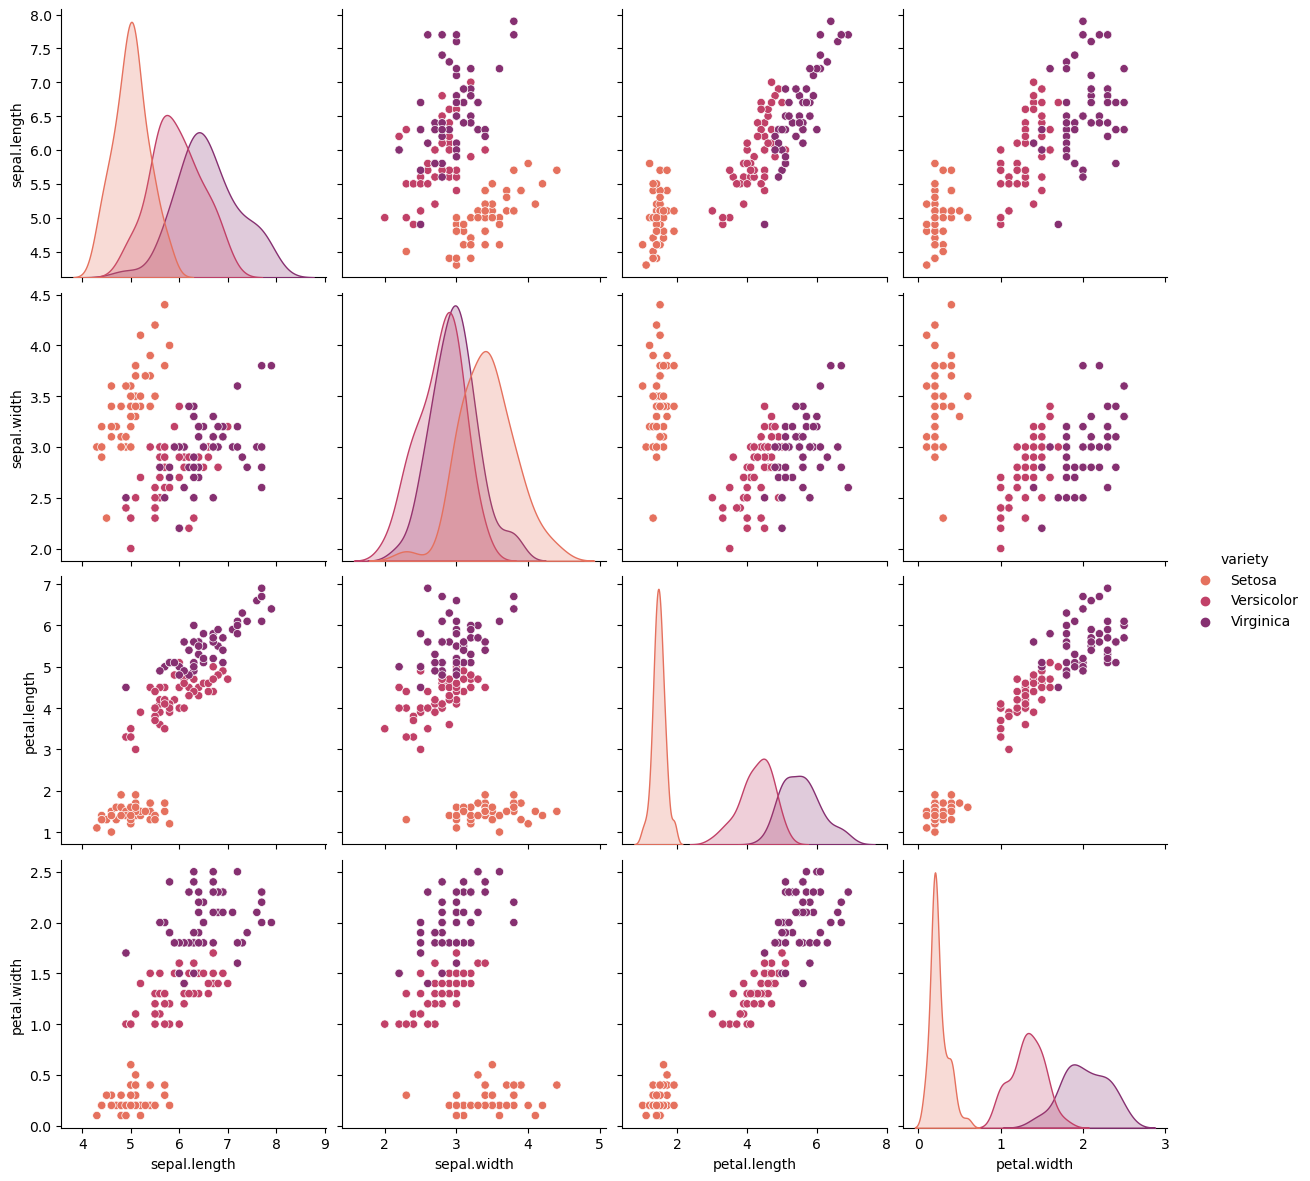

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

iris_path = r"C:\Studying Documents\Artificial intelligient\Exercise\Dataset\iris.csv"
df = pd.read_csv(iris_path, encoding='utf-8')
print(df.info())

# Pair plot of the data features
sns.pairplot(df, hue='variety', palette='flare', height=3)

As we can clearly see from the figure above, the class 1 or Setosa can be easily separated using petal.length or petal.width features, while other 2 classes are overlapped and difficult to be separated completely.

### 2. Find all the potential split of each attribute in the data

Even though the decision tree algorithm works on the assumption of discrete input variables, each of the columns in the dataset can be continuous or categorical. In this function, we will iterate through each column of the input data and list all the potential splits using a dictionary as an output.

In [22]:
def getPotentialSplits(data):
    # Initiate the dictionary
    potential_splits = {}
    n_col = data.shape[1]
    # Loep through all the column
    for col_idx in range(n_col):
        col = data[:, col_idx]
        unique_values = np.unique(col)
        potential_splits[col_idx] = unique_values
    return potential_splits

# Extract the data and label from the original dataset
data = df.to_numpy()
potential_splits = getPotentialSplits(data[:,:4])
pprint(potential_splits)

{0: array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9], dtype=object),
 1: array([2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4], dtype=object),
 2: array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3.0, 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9], dtype=object),
 3: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], dtype=object)}


### 3. Calculate the entropy 

Now the question is at which value we should split the dataset. As I have mentioned above there are 2 most common ways: Gini Index and Entropy, and in this exercise I will use the entropy to find the split value. Entropy, indeed, is a common value in many field of science used to determine the randomness of data, in which the higher the entropy the more random the data is. For example, when we throw a fair coin, the chance of getting head and tail are the same 0.5, and the randomness is high. Thus, to effectively classify the data, we need to reduce the value of entropy during traversing down to the leaf node.

$$ E(S) = - \sum_{i=1}^N p_ilog_2p_i\ $$

In [23]:
def entropy(data):
    label = data[:,-1]
    _, counts = np.unique(label, return_counts=True)
    # Get the probabilities of each count
    prob = counts / counts.sum()
    entropy = sum(prob * (- np.log2(prob)))
    return entropy

print("Entropy of the whole dataset is: {}".format(entropy(data)))

Entropy of the whole dataset is: 1.584962500721156


One more thing to notice is that in the process of building the decision tree we will have to continuously split the dataset and calculate the entropy of those child data in order to determine the best value to split. 

In [24]:
def childEntropy(left_data, right_data):
    total_len = len(left_data) + len(right_data)
    left_data_entropy = entropy(left_data)
    right_data_entropy = entropy(right_data)
    child_entropy = len(left_data)/total_len * left_data_entropy + len(right_data)/total_len * right_data_entropy
    return child_entropy

### 4. Split data into 2 paritions

This function is used to split the data into 2 paritions in case in case we can provide the split column and split value.

(0.0, 2.5)

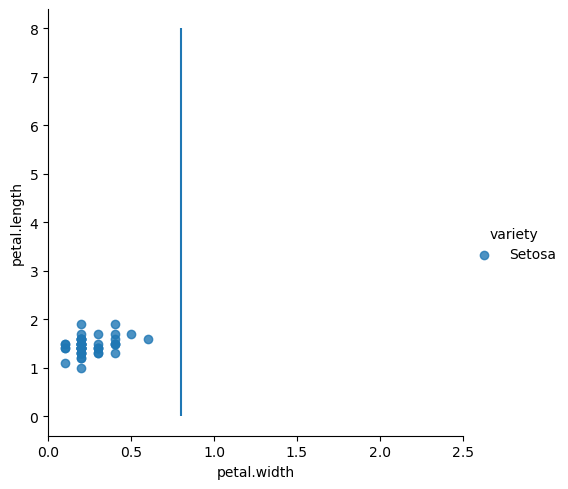

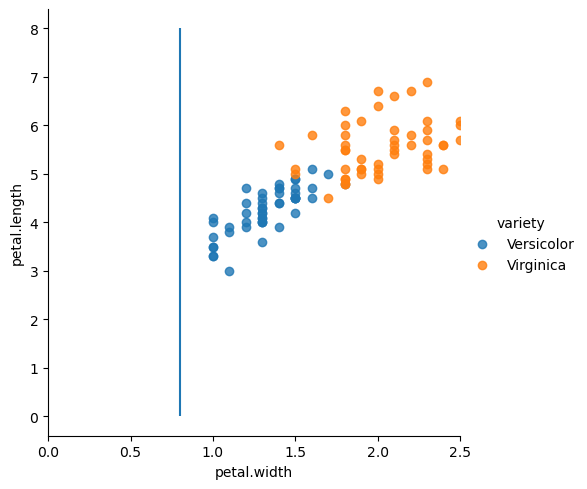

In [25]:
def splitData(data, split_col, split_val):
    column_val = data[:,split_col]
    unique_val = np.unique(column_val)
    # Case of categorical data
    if isinstance(split_col, str) or len(unique_val) < 10:
        left_data = data[column_val == split_val]
        right_data = data[column_val != split_val]
    # Case of continuous data
    else:
        left_data = data[column_val <= split_val]
        right_data = data[column_val > split_val]
    return left_data, right_data

# Suppose we split the data using attribute petal width at value of 0.8
left_data, right_data = splitData(data, 3, 0.8)
col_names = df.columns
ld = pd.DataFrame(left_data, columns=col_names)
rd = pd.DataFrame(right_data, columns=col_names)

# Plot the separated data
sns.lmplot(data=ld,x="petal.width",y="petal.length",hue="variety",fit_reg=False)
plt.vlines(x=0.8,ymin=0,ymax=8)
plt.xlim(0,2.5)

sns.lmplot(data=rd,x="petal.width",y="petal.length",hue="variety",fit_reg=False)
plt.vlines(x=0.8,ymin=0,ymax=8)
plt.xlim(0,2.5)

### 5. Determine the best column and best value to split the data

In this function, we will try all posible combinations of potential splits and determine the best attribute and best value to split the data using the value of information gain (IG), or the value of the reduction of randomness.

In [26]:
def bestSplit(data, potential_splits):
    # Get the parent dataset entropy
    parent_entropy = entropy(data)
    best_entropy = 1000

    for idx in potential_splits:
        for values in potential_splits[idx]:
            left_data, right_data = splitData(data, idx, values)
            child_entropy = childEntropy(left_data, right_data)
            if child_entropy < best_entropy:
                best_column = idx
                best_value = values
                best_entropy = child_entropy
                information_gain = parent_entropy - best_entropy
    return best_column, best_value, information_gain

best_split_col, best_split_val, information_gain = bestSplit(data, potential_splits)
print("Best split column is {} with best split value {} and information gain {}".format(df.columns[best_split_col], best_split_val, information_gain))

Best split column is petal.length with best split value 1.9 and information gain 0.9182958340544894


Compare the above result with the histogram plotted at the head of the context, we can see the algorithm is reasonable. 

### 6. Check the purity of data

In case of continuously splitting the data, at a moment all the data in one child dataset will belong only to one label, which means it has reached the leaf node and the process of building the tree has completed.

In [27]:
def purityCheck(data):
    label = data[:,-1]
    unique_classes,_ = np.unique(label,return_counts=True)

    if len(unique_classes) == 1:
        return True
    else:
        return False   
    
# Using the left dataset and the right dataset splitted above
print(purityCheck(left_data))

True


### 7. Build the decision tree

In this function, we will loop thorugh the dataset, and if they are not pure, we will find the best value to split it until it is pure, and we will return the classification of the dataset. Also, we must constraint some variable for this funcitom
- max_depth: the maixmum depth at which the tree stop dividing
- min_sample: the minimum number of sample of a dataset.

In [28]:
# Function to get the classification of data from the leaf node
def classify(data):
    label = data[:,-1]
    unique_classes,unique_count = np.unique(label,return_counts=True)
    class_idx = unique_count.argmax()
    classification = unique_classes[class_idx] 
    return classification

# Function to build the decision tree
def buildDecisionTree(df, min_sample=3, counter=0, max_depth=5):
    # Prepare the data
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df

    # Case reach the max depth
    if purityCheck(data) or (len(data) < min_sample) or (counter == max_depth):
        return classify(data)
    else:
        counter += 1
        potential_splits = getPotentialSplits(data[:,:4])
        best_col, best_val, information_gain = bestSplit(data, potential_splits)
        left_data, right_data = splitData(data, best_col, best_val)

        # Case split data is also purity
        if len(left_data) == 0 or len(right_data) == 0:
            return classify(data)
        
        feature_name = COLUMN_HEADERS[best_col]
        if isinstance(data[best_col], str):
            branch = "{} = {}".format(feature_name, best_val)
        else:
            branch = "{} <= {}".format(feature_name, best_val)
        tree = {branch: []}
        # Recursively traverse to the 
        left_child = buildDecisionTree(left_data, min_sample, counter, max_depth)
        right_child = buildDecisionTree(right_data, min_sample, counter, max_depth)

        if left_child == right_child:
            tree = left_child
        else:
            tree[branch].append(left_child)
            tree[branch].append(right_child)
        return tree
    
# General function for building decision tree
def fit(data, label):
    data["label"] = label
    tree = buildDecisionTree(data)
    return tree

# Check the algorithm
label = df['variety']
df.drop(['variety'], axis=1, inplace=True)
decision_tree = fit(df, label)
pprint(decision_tree)

{'petal.length <= 1.9': ['Setosa',
                         {'petal.width <= 1.7': [{'petal.length <= 4.9': [{'petal.width <= 1.7': ['Virginica',
                                                                                                  'Versicolor']},
                                                                          {'sepal.length <= 6.7': ['Versicolor',
                                                                                                   {'sepal.width <= 2.7': ['Versicolor',
                                                                                                                           'Virginica']}]}]},
                                                 {'petal.length <= 4.8': [{'sepal.length <= 5.9': ['Versicolor',
                                                                                                   'Virginica']},
                                                                          'Virginica']}]}]}


We have succesfully build the decision tree for Iris dataset. Now, we gonna use it for classification problem

### 8. Classification

The last part of our context is applying the decision tree into classification problem. This final function will take the input of new data and the decision tree in order to make a prediction of the output.

In [29]:
def classifySample(test, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # Feature is continuous
    if comparison_operator == "<=":
        if test[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # Feature is categorical
    else:
        if str(test[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # Recursive call the function until the leaf node
    else:
        residual_tree = answer
        return classifySample(test, residual_tree)

# Function to make a prediction for a whole set of data
def predict(new_data,tree):
    output = []
    index = new_data.index.tolist()
    for i in index:
        output.append(classifySample(new_data.loc[i],tree))
    return output

# Randomly selecting some sample in the Iris data set and check for the classification algorithm
import random
df_test = pd.read_csv(iris_path, encoding='utf-8')
test_size = 50
indices = df_test.index.tolist()
test_indices = random.sample(population=indices, k=test_size)

# Get the train data and test data
test_df = df_test.loc[test_indices]
train_df = df_test.drop(test_indices)

y_train = train_df['variety']
X_train = train_df.drop(['variety'],axis=1)

y_test = test_df['variety']
X_test = test_df.drop(['variety'],axis=1)

tree = fit(X_train,y_train)
# Predicting on the test data
test_output = predict(X_test,tree)

accuracy = (y_test == test_output)
accuracy = accuracy.mean()
print('Accuracy of the prediction algorithm is  {} '.format(accuracy))

Accuracy of the prediction algorithm is  0.92 


### 9. The OOP version of the Decision Tree algorithm

After finished programming all the function of the algorithm, I am going to combine them into a class for modulization

In [30]:
class DecisionTree:
    def __init__(self, min_sample, max_depth):
        self.__min_sample = min_sample
        self.__max_depth = max_depth
        
    def __getPotentialSplits(self, data):
        potential_splits = {}
        n_col = data.shape[1]
        for col_idx in range(n_col):
            col = data[:, col_idx]
            unique_values = np.unique(col)
            potential_splits[col_idx] = unique_values
        return potential_splits
    
    def __entropy(self, data):
        label = data[:,-1]
        _, counts = np.unique(label, return_counts=True)
        prob = counts / counts.sum()
        entropy = sum(prob * (- np.log2(prob)))
        return entropy
    
    def __childEntropy(self, left_data, right_data):
        total_len = len(left_data) + len(right_data)
        left_data_entropy = self.__entropy(left_data)
        right_data_entropy = self.__entropy(right_data)
        child_entropy = len(left_data)/total_len * left_data_entropy + len(right_data)/total_len * right_data_entropy
        return child_entropy
    
    def __splitData(self, data, split_col, split_val):
        column_val = data[:,split_col]
        unique_val = np.unique(column_val)
        if isinstance(split_col, str) or len(unique_val) < 10:
            left_data = data[column_val == split_val]
            right_data = data[column_val != split_val]
        else:
            left_data = data[column_val <= split_val]
            right_data = data[column_val > split_val]
        return left_data, right_data
    
    def __bestSplit(self, data, potential_splits):
        parent_entropy = self.__entropy(data)
        best_entropy = 1000

        for idx in potential_splits:
            for values in potential_splits[idx]:
                left_data, right_data = self.__splitData(data, idx, values)
                child_entropy = self.__childEntropy(left_data, right_data)
                if child_entropy < best_entropy:
                    best_column = idx
                    best_value = values
                    best_entropy = child_entropy
                    information_gain = parent_entropy - best_entropy
        return best_column, best_value, information_gain

    def __purityCheck(self, data):
        label = data[:,-1]
        unique_classes,_ = np.unique(label,return_counts=True)

        if len(unique_classes) == 1:
            return True
        else:
            return False 
    
    def __classify(self, data):
        label = data[:,-1]
        unique_classes,unique_count = np.unique(label,return_counts=True)
        class_idx = unique_count.argmax()
        classification = unique_classes[class_idx] 
        return classification

    def __buildDecisionTree(self, df, min_sample=3, counter=0, max_depth=5):
        if counter == 0:
            global COLUMN_HEADERS
            COLUMN_HEADERS = df.columns
            data = df.values
        else:
            data = df

        if self.__purityCheck(data) or (len(data) < min_sample) or (counter == max_depth):
            return self.__classify(data)
        else:
            counter += 1
            potential_splits = self.__getPotentialSplits(data[:,:4])
            best_col, best_val, information_gain = self.__bestSplit(data, potential_splits)
            left_data, right_data = self.__splitData(data, best_col, best_val)

            if len(left_data) == 0 or len(right_data) == 0:
                return self.__classify(data)
            
            feature_name = COLUMN_HEADERS[best_col]
            if isinstance(data[best_col], str):
                branch = "{} = {}".format(feature_name, best_val)
            else:
                branch = "{} <= {}".format(feature_name, best_val)
            tree = {branch: []}
            left_child = self.__buildDecisionTree(left_data, min_sample, counter, max_depth)
            right_child = self.__buildDecisionTree(right_data, min_sample, counter, max_depth)

            if left_child == right_child:
                tree = left_child
            else:
                tree[branch].append(left_child)
                tree[branch].append(right_child)
            return tree
        
    def fit(self, data, label):
        data["label"] = label
        tree = buildDecisionTree(data, self.__min_sample, 0, self.__max_depth)
        return tree
    
    def __classifySample(self, test, tree):
        question = list(tree.keys())[0]
        feature_name, comparison_operator, value = question.split(" ")

        if comparison_operator == "<=":
            if test[feature_name] <= float(value):
                answer = tree[question][0]
            else:
                answer = tree[question][1]
        
        else:
            if str(test[feature_name]) == value:
                answer = tree[question][0]
            else:
                answer = tree[question][1]

        if not isinstance(answer, dict):
            return answer

        else:
            residual_tree = answer
            return self.__classifySample(test, residual_tree)

    def predict(self, new_data, tree):
        output = []
        index = new_data.index.tolist()
        for i in index:
            output.append(self.__classifySample(new_data.loc[i],tree))
        return output

# Use the data get from above cell
decision_tree = DecisionTree(3, 5)
test_tree = decision_tree.fit(X_train, y_train)
pprint(test_tree)
output_prediciton = decision_tree.predict(X_test, test_tree)   

accuracy = (y_test == output_prediciton)
accuracy = accuracy.mean()
print('Accuracy of the prediction algorithm is  {} '.format(accuracy))

{'petal.length <= 1.9': ['Setosa',
                         {'petal.width <= 1.7': [{'sepal.length <= 7.0': ['Versicolor',
                                                                          'Virginica']},
                                                 {'petal.length <= 4.8': [{'sepal.length <= 5.9': ['Versicolor',
                                                                                                   'Virginica']},
                                                                          'Virginica']}]}]}
Accuracy of the prediction algorithm is  0.92 


## III. Conclusion

In this exercise, I have successfully program the Decision Tree algorithm from scratch in Python and utilize it for the problem of classification of the Iris dataset. Testing with ramdon selection of 50 samples from the Iris dataset, I found that the accuracy ranges from 0.85 to 0.93, which is a very high probability. However, decision tree algorithm can be overfitted and we can use other function such as Random Forest to avoid this issue.

### IV. Reference

1. https://github.com/karangautam/Decision-Tree-From-Scratch/blob/master/README.md.
2. https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/.
3. https://machinelearningcoban.com/tabml_book/ch_model/decision_tree.html.